In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('../artifacts/singlish_reviews.csv', encoding='ISO-8859-1')

In [9]:
data.tail()

,Review (Singlish),Sentiment
1015,Hodta pack krl tibba..penumth 4to eka wagemaii..,1
1016,Supiri,1
1017,Supiri badu,1
1018,travel karana ayata maru,1
1019,kiyala thibba widihatama thiye,1


## Data Preprocessing

In [12]:
data.shape

(1020, 2)

In [13]:
data.duplicated() .sum()

np.int64(168)

In [14]:
data = data.drop_duplicates()

In [15]:
data.duplicated() .sum()

np.int64(0)

In [16]:
print(f"Original rows: {data.shape[0]}, After removing duplicates: {data.shape[0]}")

Original rows: 852, After removing duplicates: 852


In [17]:
data.isnull().sum()

Review (Singlish)    0
Sentiment            0
dtype: int64

### Text Preprocessing

In [18]:
data["Review (Singlish)"].head(5)

0    Material eka bombai! Fit eka perfect! Ithin fu...
1    Phone eka super shiok! Battery life eka long-l...
2    Chilli crab damn shiok! Sedap gila! Confirm or...
3    Delivery eka super fast! Order morning, sampai...
4    Seller responsive sia. Reply damn fast and hel...
Name: Review (Singlish), dtype: object

In [19]:
import re
import string


##### Convert Uppercase to Lowercase

In [20]:
data["Review (Singlish)"] = data["Review (Singlish)"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [21]:
data["Review (Singlish)"].head(5)

0    material eka bombai! fit eka perfect! ithin fu...
1    phone eka super shiok! battery life eka long-l...
2    chilli crab damn shiok! sedap gila! confirm or...
3    delivery eka super fast! order morning, sampai...
4    seller responsive sia. reply damn fast and hel...
Name: Review (Singlish), dtype: object

#### remove links 

In [22]:
data["Review (Singlish)"] = data["Review (Singlish)"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [23]:
data["Review (Singlish)"].head(5)

0    material eka bombai! fit eka perfect! ithin fu...
1    phone eka super shiok! battery life eka long-l...
2    chilli crab damn shiok! sedap gila! confirm or...
3    delivery eka super fast! order morning, sampai...
4    seller responsive sia. reply damn fast and hel...
Name: Review (Singlish), dtype: object

#### remove punctuation

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
        return text 
data["Review (Singlish)"] = data["Review (Singlish)"].apply(remove_punctuations)   

In [26]:
data["Review (Singlish)"].head(5)

0    material eka bombai fit eka perfect ithin full...
1    phone eka super shiok battery life eka long-la...
2    chilli crab damn shiok sedap gila confirm orde...
3    delivery eka super fast order morning, sampai ...
4    seller responsive sia. reply damn fast and hel...
Name: Review (Singlish), dtype: object

#### remove numbers 

In [27]:
data["Review (Singlish)"] = data["Review (Singlish)"].str.replace(r'\d+', '', regex=True)

In [28]:
data["Review (Singlish)"].head(5)

0    material eka bombai fit eka perfect ithin full...
1    phone eka super shiok battery life eka long-la...
2    chilli crab damn shiok sedap gila confirm orde...
3    delivery eka super fast order morning, sampai ...
4    seller responsive sia. reply damn fast and hel...
Name: Review (Singlish), dtype: object

#### remove stopwords

In [30]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl (273 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [31]:
import pandas as pd
from nltk.corpus import stopwords
import nltk

In [32]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [33]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [34]:
data["Review (Singlish)"] = data["Review (Singlish)"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [35]:
data["Review (Singlish)"].tail(5)

1009                                  ganata watinwa
1015    hodta pack krl tibba..penumth eka wagemaii..
1017                                     supiri badu
1018                        travel karana ayata maru
1019                  kiyala thibba widihatama thiye
Name: Review (Singlish), dtype: object

#### Stemming

In [36]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [37]:
data["Review (Singlish)"] = data["Review (Singlish)"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [38]:
data["Review (Singlish)"].tail(5)

1009                                  ganata watinwa
1015    hodta pack krl tibba..penumth eka wagemaii..
1017                                     supiri badu
1018                        travel karana ayata maru
1019                   kiyala thibba widihatama thiy
Name: Review (Singlish), dtype: object

In [39]:
data["Review (Singlish)"].head(5)

0    materi eka bombai fit eka perfect ithin full s...
1    phone eka super shiok batteri life eka long-la...
2    chilli crab damn shiok sedap gila confirm orde...
3    deliveri eka super fast order morning, sampai ...
4         seller respons sia. repli damn fast helpful.
Name: Review (Singlish), dtype: object

### Building Vacabulary

In [40]:
from collections import Counter
vocab = Counter()

In [41]:
vocab

Counter()

In [42]:
for sentence in data['Review (Singlish)']:
    vocab.update(sentence.split())

In [43]:
len(vocab)

1366

In [44]:
data.shape

(852, 2)

In [45]:
len(vocab)

1366

In [46]:
vocab

Counter({'eka': 133,
         'meka': 108,
         'ganna': 85,
         'na': 79,
         'ne': 75,
         'epa': 67,
         'supiri': 58,
         'product': 57,
         'ekak': 48,
         'godak': 47,
         'ganata': 40,
         'hoda': 40,
         'qualiti': 39,
         'hodai': 39,
         'nm': 36,
         'wada': 28,
         'maru': 27,
         'baya': 25,
         'nam': 24,
         'recommend': 23,
         'karanna': 21,
         'meke': 20,
         'weda': 19,
         'wedak': 18,
         'badu': 18,
         'melo': 18,
         'order': 16,
         'hodata': 16,
         'wela': 16,
         'ekk': 16,
         'deliveri': 15,
         'servic': 15,
         'rahak': 15,
         'wadak': 15,
         'puluwan': 14,
         'nathuwa': 13,
         'eke': 12,
         'damag': 12,
         'photo': 12,
         'kisima': 12,
         'supiriyak': 12,
         'una': 11,
         'watinawa': 11,
         'mn': 11,
         'size': 10,
         'price

In [47]:
tokens = [key for key in vocab if vocab[key] > 1]

In [48]:
tokens

['materi',
 'eka',
 'perfect',
 'ithin',
 'satisfi',
 'phone',
 'super',
 'shiok',
 'damn',
 'order',
 'deliveri',
 'fast',
 'seller',
 'respons',
 'sia.',
 'repli',
 'size',
 'cannot',
 'qualiti',
 'money',
 'slow',
 'one',
 'week',
 'custom',
 'servic',
 'chat',
 'ekanam',
 'hondai,',
 'meka',
 'mara',
 'lassanai,',
 'welawatama',
 'una,',
 'meke',
 'build',
 'supiri',
 'ekak,',
 'time',
 'hariyata',
 'dunna',
 'eke',
 'use',
 'karanawa,',
 'godak',
 'practic',
 'wenawa.',
 'supiri,',
 'warranti',
 'watinawa.',
 'menu',
 'athi',
 'product',
 'maru',
 'hithapu',
 'nadda',
 'ekak',
 'karanna',
 'sound',
 'idin',
 'issu',
 'kalin',
 'care',
 'ekata',
 'balaporoththu',
 'eka.',
 'lassanai',
 'hondai',
 'puluwan',
 'price',
 'hari',
 'hodai',
 'wenawa',
 'set',
 'hariyatama',
 'thiyenawa',
 'una',
 'disappoint',
 'ne',
 'aduwata',
 'aya',
 'amarui',
 'thibuna',
 'karaddi',
 'hodata',
 'ganna',
 'hithuwatath',
 'wada',
 'ikmanata',
 'awa',
 'hondata',
 'weda',
 'karanawa',
 'wedak',
 'na',

In [49]:
len(vocab)

1366

In [50]:
len(tokens)

455

In [51]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Divide dataset

In [52]:
data

,Review (Singlish),Sentiment
0,materi eka bombai fit eka perfect ithin full s...,1
1,phone eka super shiok batteri life eka long-la...,1
2,chilli crab damn shiok sedap gila confirm orde...,1
3,"deliveri eka super fast order morning, sampai ...",1
4,seller respons sia. repli damn fast helpful.,1
...,...,...
1009,ganata watinwa,1
1015,hodta pack krl tibba..penumth eka wagemaii..,1
1017,supiri badu,1
1018,travel karana ayata maru,1


In [53]:
x = data['Review (Singlish)']
y = data['Sentiment']

In [54]:
x

0       materi eka bombai fit eka perfect ithin full s...
1       phone eka super shiok batteri life eka long-la...
2       chilli crab damn shiok sedap gila confirm orde...
3       deliveri eka super fast order morning, sampai ...
4            seller respons sia. repli damn fast helpful.
                              ...                        
1009                                       ganata watinwa
1015         hodta pack krl tibba..penumth eka wagemaii..
1017                                          supiri badu
1018                             travel karana ayata maru
1019                        kiyala thibba widihatama thiy
Name: Review (Singlish), Length: 852, dtype: object

In [55]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1009    1
1015    1
1017    1
1018    1
1019    1
Name: Sentiment, Length: 852, dtype: int64

In [57]:
pip install scikit-learn

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 3.3 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.1 MB 3.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.1 MB 4.2 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 4.3 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 4.6 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 4.7 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 4.8 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 5.1 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 5.5 MB/s eta 0:00:01
   ----------------

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [59]:
x_train

164                         damag hodatama
462    gewwa ganata padui. ayanam gann na.
792                       supiriyak thamai
304             mek gdrt awm size awl yawi
906                                 supiri
                      ...                 
70                             kethai meka
609                       iye demm ada awa
515                         result na meke
199                        modayata anduwa
995                             sapa tamai
Name: Review (Singlish), Length: 681, dtype: object

In [60]:
x_test.shape

(171,)

In [61]:
x_train.shape

(681,)

### Vectorization

In [62]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [63]:
vectorized_X_train = vectorizer(x_train, tokens)

In [64]:
vectorized_X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(681, 455), dtype=float32)

In [65]:
vectorized_X_test = vectorizer(x_test, tokens)

In [66]:
y_train.value_counts()

Sentiment
1    353
0    328
Name: count, dtype: int64

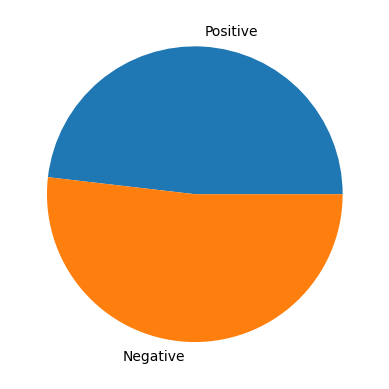

In [67]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [69]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)


In [70]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_X_train_smote, y_train_smote = smote.fit_resample(vectorized_X_train, y_train)
print(vectorized_X_train_smote.shape, y_train_smote.shape)

(706, 455) (706,)


In [71]:
y_train_smote.value_counts()

Sentiment
0    353
1    353
Name: count, dtype: int64

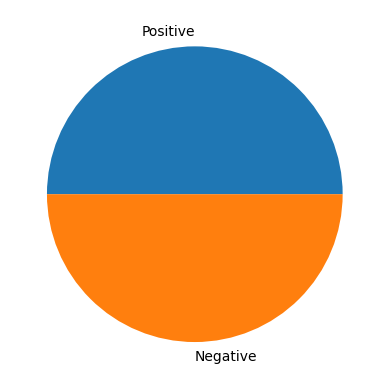

In [72]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [73]:
vectorized_X_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(706, 455), dtype=float32)

In [74]:
y_train_smote

0      0
1      0
2      1
3      0
4      1
      ..
701    0
702    0
703    0
704    0
705    0
Name: Sentiment, Length: 706, dtype: int64

In [75]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(171, 455), dtype=float32)

In [76]:
y_test

914    1
336    0
607    1
494    0
24     1
      ..
448    0
845    1
464    0
656    1
752    1
Name: Sentiment, Length: 171, dtype: int64

# Model Training and Evaluation

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [79]:
lr = LogisticRegression()
lr.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_X_train_smote)

y_test_pred = lr.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.915
	Precision = 0.895
	Recall = 0.941
	F1-Score = 0.917
Testing Scores:
	Accuracy = 0.807
	Precision = 0.807
	Recall = 0.816
	F1-Score = 0.811


### Naive Bayes

In [80]:
mnb = MultinomialNB()
mnb.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_X_train_smote)

y_test_pred = mnb.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.898
	Precision = 0.91
	Recall = 0.884
	F1-Score = 0.897
Testing Scores:
	Accuracy = 0.825
	Precision = 0.861
	Recall = 0.782
	F1-Score = 0.819


### Decision Tree

In [81]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_X_train_smote)

y_test_pred = dt.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.972
	Precision = 0.964
	Recall = 0.98
	F1-Score = 0.972
Testing Scores:
	Accuracy = 0.784
	Precision = 0.798
	Recall = 0.77
	F1-Score = 0.784


### Random Forest

In [82]:
rf = RandomForestClassifier()

rf.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_X_train_smote)

y_test_pred = rf.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.972
	Precision = 0.959
	Recall = 0.986
	F1-Score = 0.972
Testing Scores:
	Accuracy = 0.795
	Precision = 0.789
	Recall = 0.816
	F1-Score = 0.802


### Support Vector Machine 

In [83]:
svm = SVC()

svm.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_X_train_smote)

y_test_pred = svm.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.936
	Precision = 0.91
	Recall = 0.969
	F1-Score = 0.938
Testing Scores:
	Accuracy = 0.801
	Precision = 0.805
	Recall = 0.805
	F1-Score = 0.805


In [84]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)